# Section 2: Clustering


### Purpose and Motivation
For this section, We will import a public HR Dataset to perform K-Means clustering focusing primarily on two attributes, Salary and Absences. The aim of clustering in this example is to see if there is any relationship between an employees salary and absences. In certain business contexts, insights derived from this type of analysis may help guide decision-making for steering workforce development to improve general efficiency. Clustering is a commonly used statistical technique used in marketing for identifying customer segments, which can be instrumental for creating effectively segmented marketing campaigns, thereby increasing sales. These attributes are numeric, but we will need to perform normalization to perform the analysis.

### Data

Source:	https://www.kaggle.com/rhuebner/human-resources-data-set

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler  #Range transformation, between [0,1]
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd       # import the entire packge, so all the functions defined there is available

data = pd.read_excel('HRDataset_v14.xlsx').dropna()

data.head()    #show top 5 rows of the data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,2016-01-30,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,2016-05-06,0,15


In [90]:
cols = list(pd.Series(data.columns).unique())
colsToDrop = list(set(data.columns)-set(cols))

data = data.drop(labels=colsToDrop, axis=1)

print(list(data.columns))

['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30', 'Absences']


### Procedure (Step 1): Pre-Processing

In [91]:
subdata = data[['Salary', 'Absences']]    #select a subset columns
subdata.head()

,Salary,Absences
1,104437,17
2,64955,3
4,50825,2
10,54670,12
11,47211,15


In [92]:
## Normalize the two columns to be used for clustering into a more comparable range 

scaler1=MinMaxScaler() #create an object

scaler1.fit(subdata)

newdata=scaler1.transform(subdata)

pd.DataFrame(newdata).head()

,0,1
0,0.571041,0.842105
1,0.190982,0.105263
2,0.054965,0.052632
3,0.091978,0.578947
4,0.020176,0.736842


### Procedure (Step 2): K-Means Clustering

In [93]:
K = 2

ClusterResult = KMeans(n_clusters=K, random_state=0).fit(newdata)

data['labels'] = ClusterResult.labels_     #as a new column called "labels"

data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,labels
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,1
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,1
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,2016-01-30,0,12,0
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,2016-05-06,0,15,0


In [94]:
data.to_excel('Bupara_Final_Clustering-Kmeans-Results.xlsx', index=None)     #write the data to an Excel file called results.xlsx

In [95]:
type(data)    #show the type of data

pandas.core.frame.DataFrame

In [82]:
type(ClusterResult)

sklearn.cluster._kmeans.KMeans

### Procedure (Step 3): Evaluate Euclidean distance between cluster centers

In [96]:
print(ClusterResult.cluster_centers_)
centers = np.array(ClusterResult.cluster_centers_)

[[0.18061264 0.78277512]
 [0.21763993 0.24382385]]


In [97]:
x1 = (centers[0,0])
y1 = (centers[0,1])
x2 = (centers[1,0])
y2 = (centers[1,1])

print(x1,y1,x2,y2)

0.1806126413727199 0.7827751196172248 0.21763992648000635 0.24382384532760482


In [98]:
# Sean's simple Euclidean distance function to calculate the distance between two cluster centers

# Calculate Euclidean distance from above data using the 'math' module  
import math

a = x2 - x1
b = y2 - y1
e_dist = math.sqrt((a**2) + (b**2))

print("The Euclidean distance between the two cluster centers is", e_dist)

The Euclidean distance between the two cluster centers is 0.5402217099495553


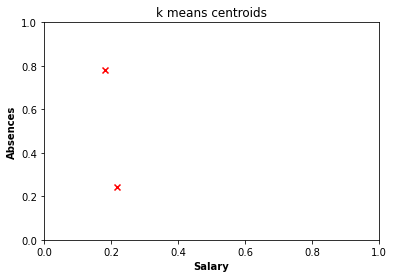

In [109]:
# Now let's plot the results

fig, ax = plt.subplots()
plt.title('k means centroids')
plt.xlim([0, 1])
plt.ylim([0, 1])
ax.set_xlabel('Salary', 
               fontweight ='bold')
ax.set_ylabel('Absences', 
               fontweight ='bold')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

## Results & Discussion

Given the Centroid plot above the results of our clustering analysis seem to suggest, based on the simple k=2 model when applied to the given HR data: employees who make slightly less will tend to be absent more. The choice of which number is assigned to k depends on the specific context. However. as we see above we can easily change the value for business situations where we may derive additional insights from segmenting further. In some cases, additional qualitative information may be helpful to confirm this initial insight, but this is not a suprising result. An interesting aspect to this insight at first glance is how close the two centroids are on the x-axis (salary), but how far they are on the y axis (absences). This phenomenon could be hypotetically attributed to a now data-driven claim that people who make slightly more tend to be absent less frequently, while people who make slightly less tend to be less motivated or have other circustance that lead to more frequent absences.